MNISTをCNNで解く
================================

## Q1. 実行結果の解釈
このノートブックをそのまま実行して、その結果を解釈し、説明してください

## Q2. 改良
「20190410_Q4_02_MNIST_on_」を参照してください。



# 結果を可視化するための関数を定義

In [0]:
# 結果を可視化するための関数を定義

import matplotlib.pyplot as plt


def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()


def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

# データの準備

In [2]:
# データのロードと分割

from keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=0)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# 学習時間を短くするために訓練データを減らす
X_train = X_train[:1000]
y_train = y_train[:1000]

X_train.shape, y_train.shape

((1000, 28, 28), (1000,))

In [0]:
# 入力データの前処理
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28, 28, 1))
X_val = X_val.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_test = X_test.astype("float32") / 255

In [0]:
# カテゴリデータに変換
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# モデルの定義とコンパイル

In [6]:
from keras import backend, layers, models

# ネットワークの初期化
model = models.Sequential()

model.add(layers.Conv2D(filters=32, # 畳み込み演算によって計算するフィルタの数
                        kernel_size=(3, 3),
                        padding="valid", # パディングなし
                        activation="relu",
                        input_shape=(28, # image_height
                                     28, # image_width
                                     1)  # channel
                       )) 

model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation="relu"))
                                                                                
model.add(layers.MaxPool2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=64,
                        kernel_size=(3, 3),
                        activation="relu"))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dens

In [0]:
# モデルのコンパイル

from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),  # 最適化アルゴリズム: RMSProp / 学習率: 0.001
              loss=categorical_crossentropy,# 損失関数: カテゴリカル交差エントロピー
              metrics=["accuracy"])         # 評価指標: 正答率

# モデルの学習

In [8]:
# モデルの学習
history = model.fit(X_train,
                    y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(X_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 1000 samples, validate on 15000 samples
Epoch 1/5
1000/1000 [==============================] - 6s 6ms/step - loss: 1.7248 - acc: 0.4370 - val_loss: 1.4290 - val_acc: 0.5275
Epoch 2/5
1000/1000 [==============================] - 1s 504us/step - loss: 0.8498 - acc: 0.7190 - val_loss: 0.6494 - val_acc: 0.7794
Epoch 3/5
1000/1000 [==============================] - 1s 509us/step - loss: 0.5160 - acc: 0.8320 - val_loss: 0.7050 - val_acc: 0.7495
Epoch 4/5
1000/1000 [==============================] - 0s 496us/step - loss: 0.4334 - acc: 0.8620 - val_loss: 0.5220 - val_acc: 0.8296
Epoch 5/5
1000/1000 [==============================] - 1s 505us/step - loss: 0.3417 - acc: 0.8860 - val_loss: 0.3992 - val_acc: 0.8759


# 結果を可視化と評価

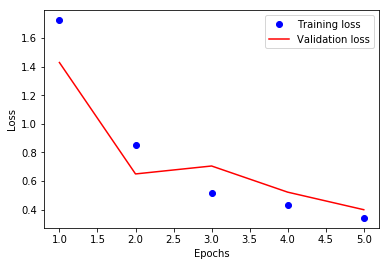

In [9]:
# 損失の可視化
plot_train_val_loss(history)

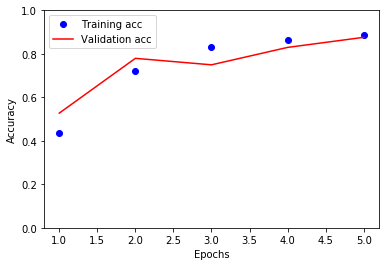

In [10]:
# 正答率の可視化
plot_train_val_acc(history)

In [11]:
# テストデータでの評価
history.model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 55us/step


[0.35617950652837754, 0.8878]

# 回答

テストデータの正答率は軽微ではあるが、まだ上昇しているためエポック数を増加させて再実行した方がよい。